# **Health Insurance Cost Analysis**

## Objectives

* Identify which variables most affect insurance charges using exploratory data analysis and visualization.
* Compare insurance charges between smokers and non-smokers to determine the impact of smoking status.
* Analyse the relationship between BMI and insurance charges by grouping BMI and visualizing average charges.
* Utilise both interactive (Plotly) and static (Matplotlib) visualizations to effectively communicate findings.

## Inputs

* The cleaned insurance data file: cleaned_insurance.csv (located in the data folder)
Python libraries: pandas, matplotlib, and plotly
Columns required: age, sex, bmi, children, smoker, region, and charges 

## Outputs

 Visualizations:
- An interactive Plotly scatter plot (BMI vs Charges, colored by smoker status)
- A Matplotlib boxplot (Charges by smoker status)
- A Matplotlib bar plot (Average charges by BMI group)
+ Cleaned data file: cleaned_insurance.csv 
+ Summary statistics and insights from the exploratory data analysis

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [6]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Student\\OneDrive\\Documents\\VS code projects\\Individual P\\Project-1--Individual\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [7]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [8]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Student\\OneDrive\\Documents\\VS code projects\\Individual P\\Project-1--Individual'

# Section 1\- Extracting Data

Section 1 content
- Imported the necessary Python libraries for data analysis and visualization: pandas, NumPy, matplotlib, seaborn, and plotly.
- Loaded the insurance dataset from the data folder.
- Displayed the first few rows to get an initial sense of the dataset’s structure.
- Used .info() to review column data types and check for missing values.
- Applied .describe() to generate summary statistics for the numerical variables.


Import the packages

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Extract the data 

In [10]:


df = pd.read_csv('data/cleaned_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27.900,0,1,16884.92400,False,False,True,Overweight
1,18,0,33.770,1,0,1725.55230,False,True,False,Obese
2,28,0,33.000,3,0,4449.46200,False,True,False,Obese
3,33,0,22.705,0,0,21984.47061,True,False,False,Normal
4,32,0,28.880,0,0,3866.85520,True,False,False,Overweight


Reviewed the dataset’s structure and key attributes to understand its overall composition.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex               1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northwest  1337 non-null   bool   
 7   region_southeast  1337 non-null   bool   
 8   region_southwest  1337 non-null   bool   
 9   bmi_category      1337 non-null   object 
dtypes: bool(3), float64(2), int64(4), object(1)
memory usage: 77.2+ KB


In [12]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.495138,30.663452,1.095737,0.204936,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,4746.344000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


# Section 2\- Transforming Data

In this section, I carried out data cleaning and preparation steps:

- Verified the absence of missing values using .isnull().sum().
- Identify and removing duplicate records to ensure data quality if necessary 

Check for any missing data.

In [13]:
df.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northwest    0
region_southeast    0
region_southwest    0
bmi_category        0
dtype: int64

There are no missing values in the dataset.


Check for duplicate rows

In [14]:
df.duplicated().sum()

np.int64(0)

No duplications in the dataset

---

# Section 3 \- Data Visualisation

In this section, I have explored the insurance dataset using various data visualisation techniques. The visualisations help identify patterns and relationships between key variables such as charges, BMI, age, and smoking status. By comparing groups such as smokers versus non-smokers and analysing how different factors influence insurance charges, I gain deeper insights into the data and highlight important trends.

### 1. Does BMI relate to insurance charges, and does smoking status affect this relationship 

To investigate this, I used an interactive Plotly scatter plot to visualise the relationship between BMI and insurance charges, with points coloured by smoking status. This allowed me to observe how charges vary with BMI and whether there are noticeable differences between smokers and non-smokers.

In [15]:
fig = px.scatter(
df, x='bmi', y='charges', color='smoker',
title='BMI vs Charges (Colored by Smoker Status)',
labels={'bmi': 'BMI', 'charges': 'Insurance Charges', 'smoker': 'Smoker'}
)
fig.show() 

In [16]:
print(df.head())
print(df.shape)

   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    1  27.900         0       1  16884.92400             False   
1   18    0  33.770         1       0   1725.55230             False   
2   28    0  33.000         3       0   4449.46200             False   
3   33    0  22.705         0       0  21984.47061              True   
4   32    0  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest bmi_category  
0             False              True   Overweight  
1              True             False        Obese  
2              True             False        Obese  
3             False             False       Normal  
4             False             False   Overweight  
(1337, 10)


In [17]:
fig = px.scatter(
    df,
    x='bmi',
    y='charges',
    color='smoker',
    title='BMI vs Charges (Colored by Smoker Status)',
    labels={'bmi': 'BMI', 'charges': 'Insurance Charges', 'smoker': 'Smoker'}
)

In [20]:
!pip install -U kaleido

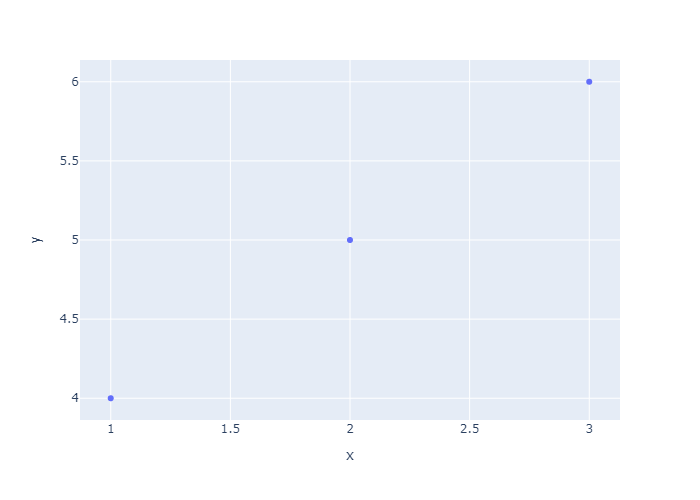

In [1]:
import plotly.express as px
fig = px.scatter(x=[1, 2, 3], y=[4, 5, 6])  # test figure
fig.write_image("plot.png")

from IPython.display import Image
Image("plot.png")

In [2]:
!pip install -U kaleido

### 2. How do insurance charges differ between smokers and non-smokers, and what is the impact of smoking status on these charges?


Created a Matplotlib boxplot to visually compare the distribution of insurance charges between smokers and non-smokers, highlighting differences in median and range.

<Figure size 600x400 with 0 Axes>

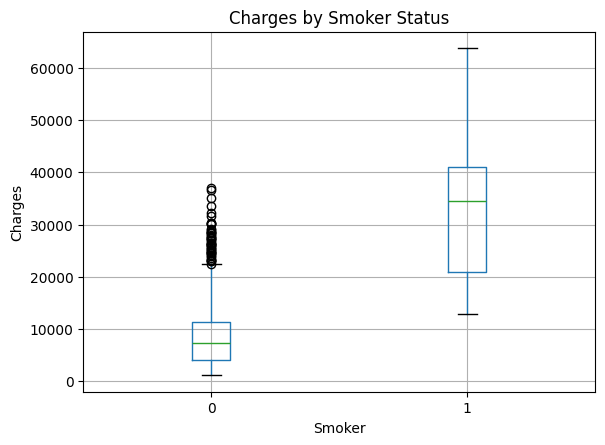

In [15]:
plt.figure(figsize=(6,4))
df.boxplot(column='charges', by='smoker')
plt.title('Charges by Smoker Status')
plt.suptitle('')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

### 3. What is the relationship between BMI group and average insurance charges?

Created a Matplotlib bar plot to display the average insurance charges for each BMI group, making it easy to compare how charges vary across different BMI categories.

C:\Users\Student\AppData\Local\Temp\ipykernel_9352\82518420.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



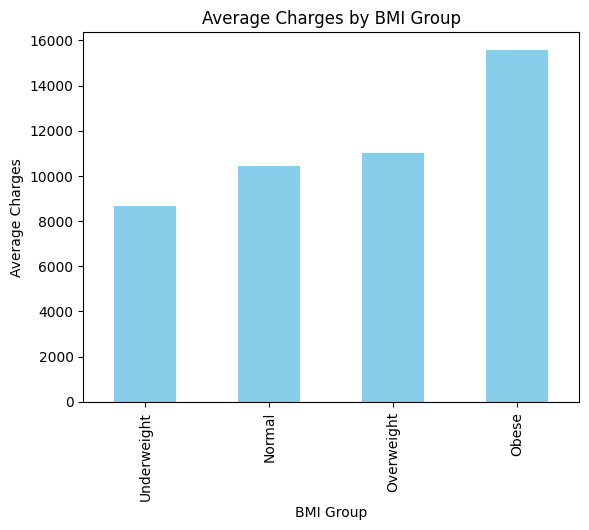

In [16]:
df['bmi_group'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
bmi_means = df.groupby('bmi_group')['charges'].mean()

bmi_means.plot(kind='bar', color='skyblue')
plt.title('Average Charges by BMI Group')
plt.xlabel('BMI Group')
plt.ylabel('Average Charges')
plt.show()

# Section 4 \- insights and Findings

---

### 1. Relationship between BMI, Smoking Status, and Insurance Charges

The scatter plot visualising BMI against insurance charges, with points coloured by smoking status, reveals a clear pattern. Smokers generally incur higher insurance charges than non-smokers across all BMI levels. Additionally, as BMI increases, insurance charges tend to rise, especially for smokers.

**Insight:**

Both higher BMI and being a smoker are associated with increased insurance charges.  
Smokers with higher BMI face the highest charges overall.  
This suggests that insurance providers view BMI and smoking status as key risk factors, likely due to their combined impact on health and potential medical costs.

### 2. Impact of Smoking Status on Insurance Charges

The boxplot comparing insurance charges for smokers and non-smokers shows a clear difference between the two groups. Smokers have noticeably higher median and upper-range charges compared to non-smokers, with a wider spread of values.

**Insight:**

Smoking status has a strong influence on insurance charges. Smokers not only pay higher average charges, but also experience a greater range in costs. This highlights the increased risk and variability associated with smoking, likely reflecting the higher likelihood of expensive health issues among smokers.

### 3. Relationship between BMI group and average insurance charges

The bar plot displaying average insurance charges for each BMI group shows a clear trend: as BMI increases from 'Underweight' to 'Obese', the average insurance charges also rise. The 'Obese' group has the highest average charges, while the 'Normal' and 'Underweight' groups have the lowest.

**Insight:**

There is a positive association between BMI group and average insurance charges. Individuals in higher BMI categories, especially those classified as 'Obese', tend to face significantly higher insurance costs. This suggests that insurance providers consider higher BMI as a risk factor, likely due to the increased likelihood of health complications and associated medical expenses in these groups.



### Summary of Findings
- Higher BMI and smoking status both lead to increased insurance charges, with smokers who have high BMI facing the highest costs.
- Smokers consistently pay more and have a wider range of insurance charges than non-smokers.
- Insurance charges rise across BMI groups, with the 'Obese' category having the highest average costs.


# Section 5\- Conclusions and Next Steps

### Conclusions

This project provided clear insights into the main factors influencing health insurance charges. Based on the analysis:

- Smoking status has the strongest impact, with smokers consistently facing much higher charges than non-smokers.
- BMI is also important—higher BMI leads to higher average charges, and the effect is even greater for smokers with high BMI.
- Both factors together (being a smoker and having a high BMI) result in the highest insurance costs in the dataset.

**Next Steps:**

If I were to extend this project, I would:

- Investigate additional variables, such as medical history or lifestyle factors, to gain deeper insights.
- Analyse how insurance charges change over time, if longitudinal data becomes available.
- Compare findings with other datasets or regions to see if similar patterns exist elsewhere.